In [48]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.util import mark_negation
from nltk import pos_tag
import contractions
import string
import emoji
import swifter
import matplotlib.pyplot as plt
from langdetect import detect


df=pd.read_csv("../Data/CombinedYoutubeDataset.csv")

lemmatizer=WordNetLemmatizer()

## Exploring the Dataset

In [49]:
df.iloc[1132,:]

Comment      Great solution. I am just stumbled upon why we...
Sentiment                                              neutral
Name: 1132, dtype: object

In [ ]:
df.head(5)

,Comment,Sentiment
0,Anyone know what movie this is?,neutral
1,The fact they're holding each other back while...,positive
2,waiting next video will be?,neutral
3,Thanks for the great video.\n\nI don't underst...,neutral
4,Good person helping good people.\nThis is how ...,positive


In [51]:
df.sample(5)

,Comment,Sentiment
461532,"I'm just a guy who works a nine-to-five job, I...",neutral
887255,Do you want us to do a fundrazing for a new br...,negative
609791,4:37 Linked List representation is for indices...,neutral
876907,This is the reason I'm avoiding America: racism.,negative
910062,We all agree that this administration is destr...,negative


In [52]:
df.shape

(1050633, 2)

## Preparing variables to remove the unnecessary punctuations and stopwords

In [53]:
punctuations=string.punctuation+"’"+"‘"

In [54]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘'

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
stopwords_=set(stopwords.words("english"))

### Keeping the stop words in the sentences like 'not',

In [57]:
set1_of_important_stopwords = {
    "are", "can", "could", "did", "does", "do", "had", "has", "have","is"
    "might", "must", "need", "shall", "should", "was", "were", "will", "would",
    "am", "not","nor","very"
}

set2_of_important_stopwords = {
    "but", "no", "nor", "not", "so", "too", "very"
}

In [58]:
important_stopwords=set1_of_important_stopwords.union(set2_of_important_stopwords)

In [59]:
len(set1_of_important_stopwords),len(set2_of_important_stopwords),len(important_stopwords)
print(f"Total of {len(important_stopwords)} stopwords to keep in the sentences for good sentiment")

Total of 26 stopwords to keep in the sentences for good sentiment


In [60]:
stopwords_=stopwords_-important_stopwords

In [61]:
"should" in stopwords_

False

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050633 entries, 0 to 1050632
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Comment    1050589 non-null  object
 1   Sentiment  1050633 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


### Dropping the NA values

In [63]:
df.isna().sum()

Comment      44
Sentiment     0
dtype: int64

In [64]:
df.dropna(inplace=True)

Sentiment
positive    354719
negative    348412
neutral     347458
Name: count, dtype: int64


<Axes: >

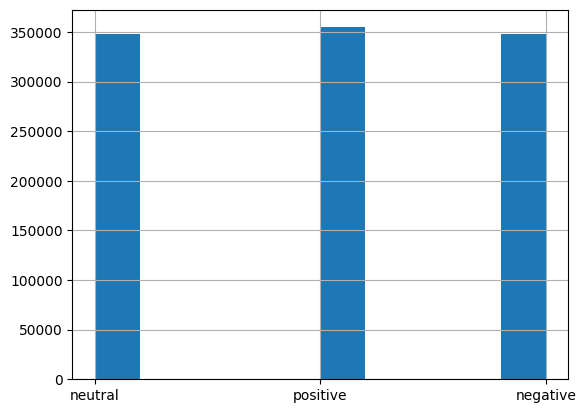

In [65]:
print(df["Sentiment"].value_counts())
df["Sentiment"].hist()

Sentiment
positive    33.763822
negative    33.163492
neutral     33.072686
Name: count, dtype: float64


Text(0.5, 1.0, 'Sentiment Distribution in Dataset')

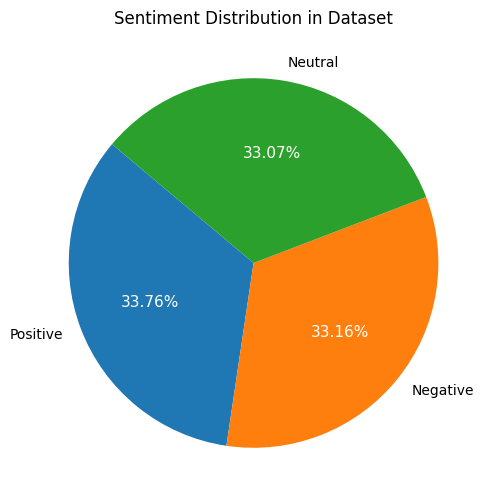

In [66]:
percentage=(df["Sentiment"].value_counts()/df["Sentiment"].shape[0])*100
print(percentage)
labels=["Positive","Negative","Neutral"]

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    percentage, labels=labels, autopct='%1.2f%%', startangle=140, 
)

# Change only autopct (values) color to black
for autotext in autotexts:
    autotext.set_color('White')
    autotext.set_fontsize("11")

plt.title("Sentiment Distribution in Dataset")

### Removing the comments which are not in english

In [67]:
def checkLanguage(x):
    # print(x)
    try:
        if detect(x)=="en":
            return x
        else:
            return None
    except:
        return None

In [ ]:
df["Comment"]=df["Comment"].swifter.apply(checkLanguage)
df

,Comment,Sentiment
0,Anyone know what movie this is?,neutral
1,The fact they're holding each other back while...,positive
2,waiting next video will be?,neutral
3,Thanks for the great video.\n\nI don't underst...,neutral
4,Good person helping good people.\nThis is how ...,positive
...,...,...
1050584,i really like the point about engineering tool...,positive
1050585,i’ve just started exploring this field and thi...,positive
1050586,NaN,neutral
1050587,hey daniel just discovered your channel a coup...,positive


In [69]:
df.isna().sum()

Comment      168343
Sentiment         0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882246 entries, 0 to 1050588
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Comment    882246 non-null  object
 1   Sentiment  882246 non-null  object
dtypes: object(2)
memory usage: 20.2+ MB


### Preprocessing data function
<p>This function handles the following problems</p>
<ul>
<li>Emoji to text</li>
<li>Removing Name Entities</li>
<li>Removing Punctuations and Stopwords</li>
<li>Lemmatization: Converting the word into root form</li>
</ul>

In [ ]:

def preprocess(x):
        x=emoji.demojize(x)
        words_=word_tokenize(contractions.fix(x.lower()))
        new_words=[]
        text_=pos_tag(words_)

        for word,tag in text_:
            if tag not in ["NNP","NNPS"]:
                new_words.append(word)

        sentence_=" "
        temp=[]
        for word in new_words:
            if "’" in word or "‘" in word:
                word=word.replace("‘","'")
                word=word.replace("’","'")

            if word not in stopwords_ and word not in punctuations:
                temp.append(lemmatizer.lemmatize(word,"v"))

        sentence_=sentence_.join(temp)
        return sentence_


In [ ]:
df["Comment"]=df["Comment"].astype(str)
sentence=df["Comment"].swifter.apply(preprocess)

In [ ]:
df["Comment"]=sentence
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882246 entries, 0 to 882245
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Comment    882024 non-null  object
 1   Sentiment  882246 non-null  object
dtypes: object(2)
memory usage: 13.5+ MB


In [75]:
df.dropna(inplace=True)

### After performing all operations on datasets.

<Axes: >

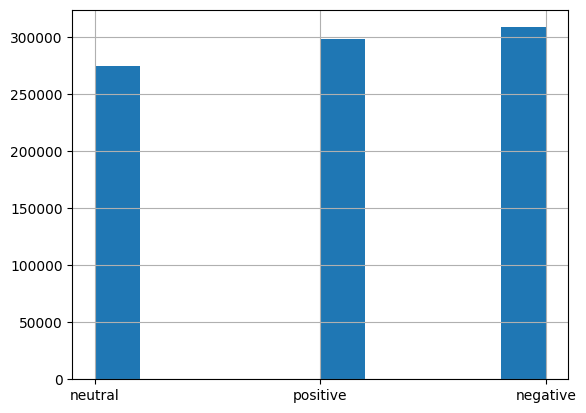

In [91]:
df["Sentiment"].hist()

### Importing models, metrics and other necessary libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

xtrain,xtest,ytrain,ytest=train_test_split(df["Comment"],df["Sentiment"],test_size=0.2,random_state=42)

le = LabelEncoder()
le.fit(df['Sentiment'])


model=LogisticRegression(multi_class="multinomial",solver="lbfgs")
# model=DecisionTreeClassifier(class_weight="balanced",random_state=42
# model = DecisionTreeClassifier(
#     criterion='gini',
#     max_depth=50,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     max_features='sqrt',
#     class_weight='balanced',
#     random_state=42
# )

# model = GradientBoostingClassifier(
#     n_estimators=200,
#     learning_rate=0.1,
#     max_depth=100,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     subsample=0.8,
#     max_features='sqrt',
#     random_state=42
# )
# model = GradientBoostingClassifier(
#     n_estimators=200,  # Try increasing this
#     learning_rate=0.05,  # Lower learning rate to avoid overfitting
#     max_depth=10,  # Experiment with depth between 10-20
#     min_samples_split=5,
#     min_samples_leaf=3,
#     subsample=0.8,
#     random_state=42,


# )
# model = XGBClassifier(
#     objective='multi:softmax',   # Multi-class classification
#     num_class=3,                 # 3 classes: Positive, Negative, Neutral
#     n_estimators=200,            # Number of boosting rounds
#     max_depth=8,                 # Tree depth (to prevent overfitting)
#     learning_rate=0.1,           # Learning rate
#     colsample_bytree=0.8,        # Fraction of features to use per tree
#     subsample=0.8,               # Fraction of samples to use per boosting round
#     gamma=0.3,                   # Minimum loss reduction to make a split
#     reg_alpha=0.1,               # L1 regularization to reduce overfitting
#     reg_lambda=1.0,              # L2 regularization
#     random_state=42,             # For reproducibility
#     n_jobs=-1                    # Use all available cores
# )

# model = XGBClassifier(
#     objective='multi:softmax',   # For multi-class classification
#     num_class=3,                 # Positive, Negative, Neutral
#     n_estimators=300,            # More boosting rounds for better performance
#     max_depth=6,                  # Lower depth to prevent overfitting
#     learning_rate=0.05,           # Smaller learning rate for better convergence
#     colsample_bytree=0.8,         # Fraction of features used per tree
#     subsample=0.8,                # Fraction of samples used per boosting round
#     gamma=0.2,                    # Minimum loss reduction to make a split
#     reg_alpha=0.1,                # L1 regularization to reduce overfitting
#     reg_lambda=1.0,               # L2 regularization
#     min_child_weight=3,           # Minimum sum of instance weight needed in a child
#     random_state=42,              # For reproducibility
#     n_jobs=-1                     # Use all CPU cores
# )


# model=MultinomialNB(alpha=1)
# model=MultinomialNB(alpha=0.1)


LabelEncoder()

In [77]:
xtrain.shape

(705619,)

In [78]:
ytrain.shape

(705619,)

### Creating Pipeline with TF-IDF Vectorizer and Classification Models

In [79]:
# pipeline=Pipeline([("vectorizer",TfidfVectorizer(ngram_range=(1,3))),("classifier",model)])

In [80]:
# pipeline.fit(xtrain,ytrain)

In [81]:
import joblib
# joblib.dump(grid_search,"model.pkl")

### Loading the models which were saved and evaluating

In [82]:
DecisionTree=joblib.load("./DecisionTree.pkl")
logistic=joblib.load("./Logistic.pkl")
gradientboost=joblib.load("./GradientBoost100depth.pkl")
xgb=joblib.load("./XGBClassifier200depth.pkl")
naive_bayes=joblib.load("./NaiveBayes2.pkl")

c:\Users\vedan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\vedan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\vedan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle esti

In [83]:
accuracy={}

def metrics(model,title,transform=False):
    global accuracy
    print(title)
    ypred=model.predict(xtest)
    if transform:
        ypred=le.inverse_transform(ypred)
    accuracy_=accuracy_score(ytest,ypred)
    accuracy[title]=accuracy_

    print(classification_report(ytest,ypred))
    

In [84]:
metrics(DecisionTree,"Decision Tree")

Decision Tree
              precision    recall  f1-score   support

    negative       0.48      0.44      0.46     62109
     neutral       0.34      0.69      0.46     54810
    positive       0.59      0.08      0.14     59486

    accuracy                           0.40    176405
   macro avg       0.47      0.41      0.35    176405
weighted avg       0.47      0.40      0.35    176405



In [85]:
metrics(xgb,"XGBoost",True) #(200 estimator, 8 max depth)

XGBoost
              precision    recall  f1-score   support

    negative       0.62      0.66      0.64     62109
     neutral       0.53      0.61      0.57     54810
    positive       0.78      0.62      0.69     59486

    accuracy                           0.63    176405
   macro avg       0.64      0.63      0.63    176405
weighted avg       0.65      0.63      0.63    176405



In [86]:
metrics(gradientboost,"GradientBoostClassifier")

GradientBoostClassifier
              precision    recall  f1-score   support

    negative       0.67      0.70      0.69     62109
     neutral       0.60      0.63      0.61     54810
    positive       0.77      0.70      0.73     59486

    accuracy                           0.68    176405
   macro avg       0.68      0.68      0.68    176405
weighted avg       0.68      0.68      0.68    176405



In [87]:
metrics(logistic,"Logistic Regression")

Logistic Regression
              precision    recall  f1-score   support

    negative       0.70      0.72      0.71     62109
     neutral       0.62      0.64      0.63     54810
    positive       0.77      0.72      0.75     59486

    accuracy                           0.70    176405
   macro avg       0.70      0.70      0.70    176405
weighted avg       0.70      0.70      0.70    176405



In [88]:
metrics(naive_bayes,"Naive Bayes") #(alpha= 0.1)(ngrams_range=(1,3))

Naive Bayes
              precision    recall  f1-score   support

    negative       0.66      0.84      0.74     62109
     neutral       0.71      0.51      0.59     54810
    positive       0.76      0.75      0.75     59486

    accuracy                           0.70    176405
   macro avg       0.71      0.70      0.69    176405
weighted avg       0.71      0.70      0.70    176405



### Testing Random Youtube Comments

In [89]:
text=[
    "Bhai u have just dropped the coldest edit without even telling us!!.",
    "Same clowns said we will lose to KKR, before match they said we lose today, Dont call yourself Cricket Analysist if you keep looking at past, Time has changed and its never happen how you say",
    "these guys seems sad and can't digest the fact that RCB won",
    "Again @MichaelVaughan said today in that Chennai are playing 6 of their first 7 games in Chennai which is a completely wrong info. Please stop manipulating @MichaelVaughan. Hi @gauravkapur please tell him the truth.",
    "xperts can't digest the fact that RCB won they all predicted csk gonna win so seems sad 😂😂 poor experts d ridin csgay",
    "Typical Thala innings. Do tuk tuk in the beginning until the match is totally lost and then smack a few sixes to improve stats when bowlers relax.",
    "kohli should retire from T20s (IPL)  and tests and focus on ODIs where he can take singles and doubles on flat pitches. in tests he can't survive and in T20s he can't hit.",
    "No coverage on kkr vs rr that is scheduled tomorrow? Shameful",
    "Maxwell from 2021-23 for RCB (one season on slow UAE pitches): 1218 runs at 161 SR and 33 average. Sehwag’s always on his back because Maxwell in his book called out Sehwag’s unprofessional, manipulative, and prickly attitude during his coaching tenure at PBKS, which led to Maxi texting him at the end that he’d lost a fan due to the way Sehwag had behaved during those years. Also shame at Gaurav Kapoor for not having done the basic cricketing research so that he could call out his buddy for this lol",
    "This is really very average, not good at all"
]   
logistic.predict(text)

array(['positive', 'negative', 'neutral', 'negative', 'negative',
       'negative', 'neutral', 'negative', 'negative', 'negative'],
      dtype=object)

### Model Accuracy BarPlot

Text(0.5, 0, 'Accuracy')

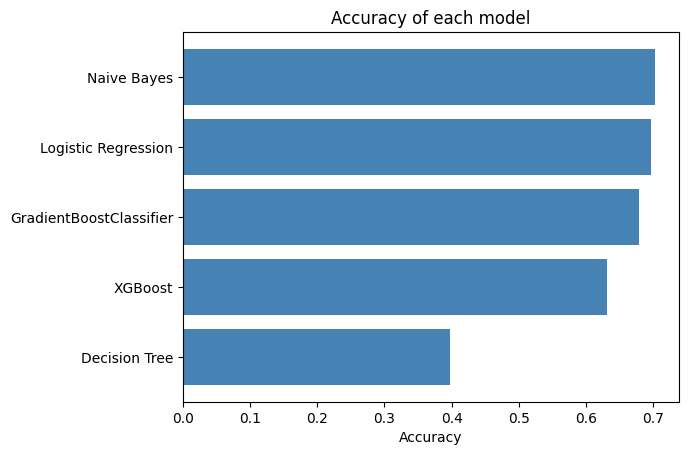

In [90]:
plt.barh(accuracy.keys(),accuracy.values(),color="steelblue")
plt.title("Accuracy of each model")
plt.xlabel("Accuracy")